# Linear Regression

In this example we will be exploring the estimation of subjective *wine quality* for Portuguese wines via linear regression.
We will implement linear regression in two different ways: a) using some lines of python code with gradient descend as an optimization procedure; b)using machine learning libraries like python's sklearn that have highly optimized implementations of many of these algorithms.

## 1) Reading, inspecting and preparing the data
We use a Portuguese red and white wine database downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality and described in:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems>, Elsevier, 47(4):547-553. ISSN: 0167-9236.
  
In this exercise we will use the red wine, which is what I enjoy drinking more...


In [323]:
%matplotlib inline #show plots in the notebok itself

import pandas as pd #used for reading/writing data 
import numpy as np #numeric library library
from matplotlib import pyplot as plt #used for plotting
import sklearn #machine learning library

wineData = pd.read_csv('data/winequality/winequality-red.csv', sep=';')

We can inspect the contents:

In [324]:
wineData.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [342]:
wineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


All columns except the last one are the input parameters of the system, obtained from real vines obtained through physicochemical tests. The last column shows the output value, based on sensory tests.
To work with this data we will need to split it into two variables:

In [326]:
wineDataInput = wineData.drop('quality', axis=1)
wineDataOutput = wineData['quality']

## 3) Linear regression training using gradient descend way
To perform optimization by gradient descent, we will need to implement the following formulas. In all of these formulas, h(x) is the prediction (i.e. output) of x by the linear regressor.

Cost (m is the length of X):

$$\frac{1}{2m}\sum\limits_{i=1}^{m}(h_\theta(x^i)-y^i)^2$$
Gradient of cost with respect to theta (m is the length of X):

$$\frac{1}{m}(h_\theta(x)-y)$$
Update rule (for every j in X, m is the length of X):

$$\theta_j = \theta_j + \alpha\sum\limits_{i=1}^{m}(y^i - h_\theta(x^i))x^i_j$$

(Code adapted from https://kastnerkyle.github.io/posts/linear-regression/)

### 3.1) Features normalization
The first good thing to do is to normalize the input data to go have zero mean and unit variance.
Without normalization we have a high chance of divergence in datasets containing input variables with very different dynamic ranges. In the current database if we do not apply normalization (try it below by commenting out the scale line) we need to use very small (0.0005) learning rate to avoid the algorithm to diverge. Also we need many steps to get a minimum (1000)
When normalizing we can use a much bigger learning rate without issues, with a higher rate (0.05) and only 100 steps or so.
Note that every database is a different world.

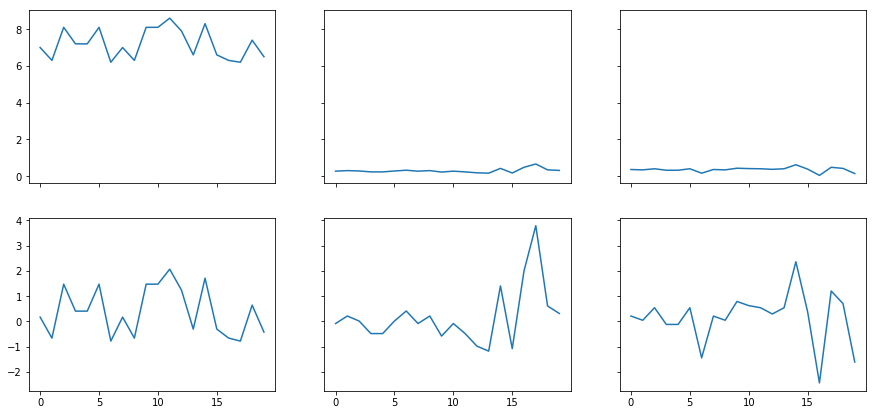

In [336]:
#prepare the data
from sklearn import preprocessing

#adapt output values to an array form
wineDataOutputArray = np.asarray(wineDataOutput.astype(float))
wineDataOutputArray = wineDataOutputArray[:, np.newaxis]
                       
#adapt input features as an array form, with an extra '1' for \theta_0 term (bias term)
wineDataInputArray_original = np.asarray(wineDataInput.astype(float))
### comment the next line out to test regression on unnormalized data
wineDataInputArray = preprocessing.scale(wineDataInputArray_original) 
wineDataInputArray = np.hstack((np.ones((wineDataInputArray.shape[0], 1)), wineDataInputArray))

#visualization of the normalized and unnormalized
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
f.set_figheight(7)
f.set_figwidth(15)
ax1.plot(wineDataInputArray_original[0:20, 0])
ax2.plot(wineDataInputArray_original[0:20, 1])
ax3.plot(wineDataInputArray_original[0:20, 2])
ax4.plot(wineDataInputArray[0:20, 1]) #note we added a column of 1's
ax5.plot(wineDataInputArray[0:20, 2])
ax6.plot(wineDataInputArray[0:20, 3])


### 3.2) Linear regression implementation in Python code
We implement the gradient descend algorithm to estimate the best value for $\theta$ parameters.
The result of this function are the best $\theta$ parameters and the mean squared error error in each step.

In [338]:
%time
#Initialize theta to zeros                                                      
learning_rate = alpha = 0.05                                                                    
iters = 1000    

def mean_squared_error(theta,X,y):                                                     
    m = y.shape[0]                      
    return 1. / (2. * m) * np.sum((np.dot(X, theta) - y) ** 2.)                            
                        
def l1_error(theta, X, y):
    m = y.shape[0]                      
    return 1. / m * np.sum(abs((np.dot(X, theta) - y)))                                
    
def gradient_update(theta,X,y):                                                
    m = y.shape[0]     
    return 1. / m * np.dot(X.T, (np.dot(X,theta) - y))                                 
                                                                                
def gradient_descent(X,y,alpha,iters):                                    
    m = y.shape[0]
    all_cost = []
    #Initialize theta to zeros
    all_theta = [np.zeros((X.shape[1],1))] #array of vectors   

    for i in range(iters):
        cost = mean_squared_error(all_theta[-1], X, y)
        all_cost.append(cost)
        all_theta.append(all_theta[-1] - float(alpha) * gradient_update(all_theta[-1], X, y))                       
    return all_theta,all_cost                                                       
                                                                             
#Perform linear regression via gradient descent
all_theta, all_cost = gradient_descent(wineDataInputArray, wineDataOutputArray, alpha, iters)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 13.4 µs


let's take a look at the mean square error w.r.t. each iteration, and the final one.

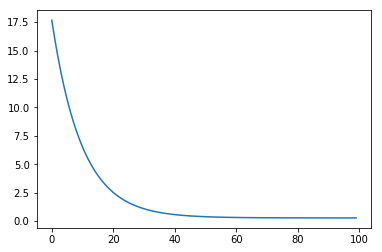

In [339]:
plt.plot(all_cost[0:100])

In [340]:
mean_squared_error(all_theta[-1], wineDataInputArray, wineDataOutputArray)

0.2818787185713405

As the value to be estimated is a subjective metric between 3 and 8 we would be most interested in knowing what is the average deviation from the output value that our hypotheses values get. We can compute this with the L1 error:

In [372]:
l1_error(all_theta[-1], wineDataInputArray, wineDataOutputArray)

0.5839321156776941

Note that we could consider that the outputs should be cathegorized after the regression. Of course, we could had approached the problem as a classification one, but this is next class...

In here one quick change we can do is to map all output hypotheses to the nearest integer, and compute error again.

In [373]:
def l1_error_int(theta, X, y):
    m = y.shape[0]                      
    return 1. / m * np.sum(abs((np.rint(np.dot(X, theta)) - y)))

l1_error_int(all_theta[-1], wineDataInputArray, wineDataOutputArray)

0.537362188648428

A bit of improvement over standard L1 error.

Over all, there is lots of room for improvement, but we see the system is able to get scores that are in the same ballpark as the desired output.

Next, let's take a look at how the $\theta$ parameters have evolved over time to stable values:

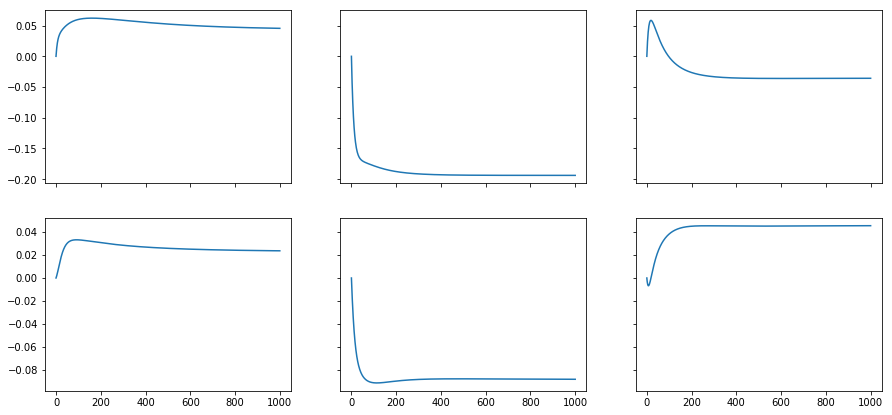

In [277]:
aa = list(map(list, zip(*all_theta)))
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
f.set_figheight(7)
f.set_figwidth(15)
ax1.plot(aa[1])
ax2.plot(aa[2])
ax3.plot(aa[3])
ax4.plot(aa[4])
ax5.plot(aa[5])
ax6.plot(aa[6])


Also, we can see in a scatter prot how the input vs output looks like:

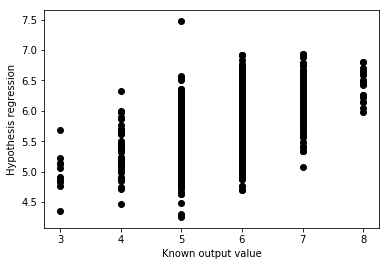

In [318]:
plt.scatter(wineDataOutputArray, np.dot(wineDataInputArray, all_theta[-1]), color='black')
plt.ylabel('Hypothesis regression')
plt.xlabel('Known output value')

It is clear that our regressor is clearly under-shooting the hypothesized value, as it estimates values around 6 to 7 for known values of 8

## 2) Running linear regression on the data with sklearn
Although it is nice to implement algorithms ourselves and know all the nuts and bolts around them, we can also rely on ready-made algorithms through the sklearn library. 

These have the advantage that internally they do not perform iterations in the same way as we do in the gradient descend, but implement optimization methods to speedup the convergence and therefore make it more efficient. Although we might not be able to see much in this small database, note the result of running the algorithm above and the one in this section by using the %time command.

In [374]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True)

As a reminder, here we want to fit the following: 
$$y = \theta_0 + \sum_{i=1}^{N} \theta_i x_i$$
Where $x_i$ is the $i^{th}$ input feature ($N=11$ in our case) with coefficients $\theta_i$ to be estimated (called "coefs_" in sklearn), and $\theta_0$ the offset (called "itercept_" in sklearn

Note that in here we do not need to define any learning rate or number of iterations, as the algorithm implementation defines its own. We did enable the normalization or input parameters by passing "normalize=True" to the constructor.

In [375]:
%time
lm.fit(wineDataInput, wineDataOutput)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.2 µs


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

We can observe the estimated coefficients and the intercept (i.e. the $\theta_0$ parameter)

In [360]:
lm.intercept_


150.19284248121073

In [361]:
lm.coef_

array([  6.55199614e-02,  -1.86317709e+00,   2.20902007e-02,
         8.14828026e-02,  -2.47276537e-01,   3.73276519e-03,
        -2.85747419e-04,  -1.50284181e+02,   6.86343742e-01,
         6.31476473e-01,   1.93475697e-01])

Let's use these parameters to predict the outputs on our input set:

In [378]:
predictedQuality = lm.predict(wineDataInput)
predictedQuality[0:10]

array([ 5.5626578 ,  5.21687319,  5.7664803 ,  5.77818339,  5.77818339,
        5.7664803 ,  5.45775994,  5.5626578 ,  5.21687319,  5.77215929])

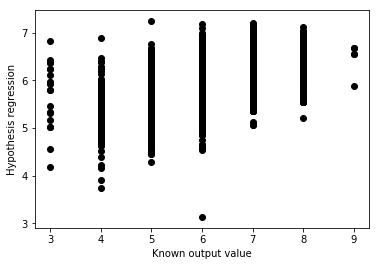

In [379]:
plt.scatter(wineDataOutput, predictedQuality,  color='black')
plt.ylabel('Hypothesis regression')
plt.xlabel('Known output value')

And we can compute the same metrics, which are consistent with our implementation above:

In [386]:
print(lm.score(wineDataInput, wineDataOutput))
print(1. / wineDataOutput.shape[0] * np.sum(abs(predictedQuality - wineDataOutput)))

0.281870364133
0.583634950028


## 4) Train versus test datasets
In reality we would never do what we just did. Our experiment is ill-defined, as we use the same data for training 
and for testing. 
We should split the data into these two subsets, being the training one much bigger, and the testing one not seen at all by the system, except to compute the prediction on the input variable.



In [387]:
from sklearn.model_selection import train_test_split

wineDataInput_train, wineDataInput_test, wineDataOutput_train, wineDataOutput_test = train_test_split(wineDataInput, wineDataOutput, test_size=0.3, random_state=0)
lm2 = LinearRegression(normalize=True)
lm2.fit(wineDataInput_train, wineDataOutput_train)
predicted = lm2.predict(wineDataInput_test)
print(lm.score(wineDataInput_test, wineDataOutput_test))
print(1. / wineDataOutput_test.shape[0] * np.sum(abs(predicted - wineDataOutput_test)))


0.26019323327
0.608501723186


Similarly consistent with results obtained above (the small discrepancy of +0.2 is due to the fact that this test data was unknown to training in this case)